<a href="https://colab.research.google.com/github/yagnik99/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Yagnik_Pandya_Team_2_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Capstone Project 3/'

In [ ]:
bike_data = pd.read_csv(folder + 'SeoulBikeData.csv', engine='python')

In [ ]:
bike_data.head(3)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Rename columns
bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count', 'Temperature(�C)' : 'Temp_C', 'Humidity(%)' : 'Humidity_Percentage', 'Wind speed (m/s)':'Wind_speed', 'Visibility (10m)': 'Visibility', 'Dew point temperature(�C)': 'Dew_point_Temp', 'Solar Radiation (MJ/m2)':'Solar_Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Functioning Day':'Functioning_Day'}, inplace=True)

In [ ]:
import datetime

In [ ]:
pd.DatetimeIndex(bike_data['Date']).max()

Timestamp('2018-12-11 00:00:00')

In [ ]:
pd.DatetimeIndex(bike_data['Date']).min()

Timestamp('2017-01-12 00:00:00')

In [ ]:
# Duration of Data
pd.DatetimeIndex(bike_data['Date']).max() - pd.DatetimeIndex(bike_data['Date']).min()

Timedelta('698 days 00:00:00')

###Checking for any incorrect data.

In [ ]:
len(bike_data[(bike_data['Functioning_Day'] == 'No') & (bike_data['Rented_Bike_Count'] != 0)])

0

In [ ]:
len(bike_data[bike_data['Rented_Bike_Count'] < 0])

0

In [ ]:
len(bike_data[(bike_data['Functioning_Day'] == 'No') & (bike_data['Rented_Bike_Count'] == 0)])

295

In [ ]:
bike_data = bike_data[bike_data['Functioning_Day'] == 'Yes']

In [ ]:
bike_data.drop('Functioning_Day', axis = 1, inplace =True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


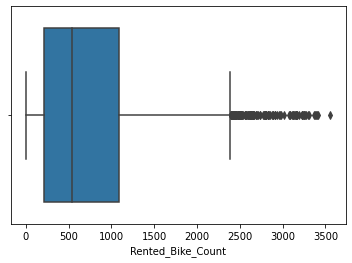

In [ ]:
# Outliers
sns.boxplot(bike_data['Rented_Bike_Count'])

In [ ]:
#Removing Outliers manually
#bike_data = bike_data[bike_data['Rented_Bike_Count']<2600]

###Exploring catagorical variables.

Text(0, 0.5, 'Counts')

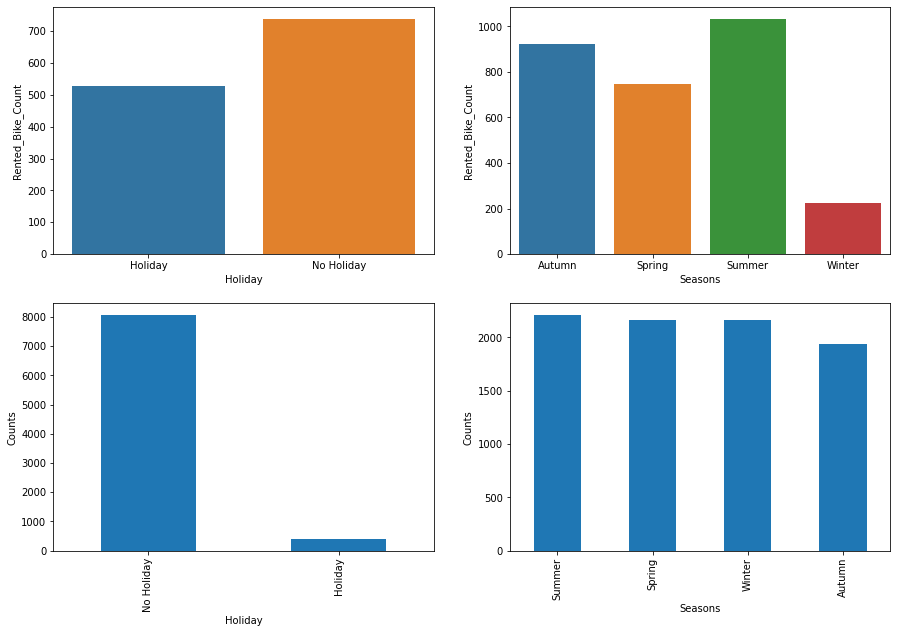

In [ ]:
Holiday_rent = pd.DataFrame(bike_data.groupby('Holiday').agg({'Rented_Bike_Count':'mean'}))
Season_rent = pd.DataFrame(bike_data.groupby('Seasons').agg({'Rented_Bike_Count':'mean'}))

# Bike rents in Seasons and holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented_Bike_Count'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented_Bike_Count'])

# How many Total Seasons and Holidays
ax1=plt.subplot(2, 2,3)
bike_data['Holiday'].value_counts().plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
bike_data['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')

###Exploring numerical variables

In [ ]:
numerical_features = ['Hour', 'Temp_C', 'Humidity_Percentage',
       'Wind_speed', 'Visibility', 'Dew_point_Temp', 'Solar_Radiation',
       'Rainfall', 'Snowfall']

In [ ]:
# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)

In [ ]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

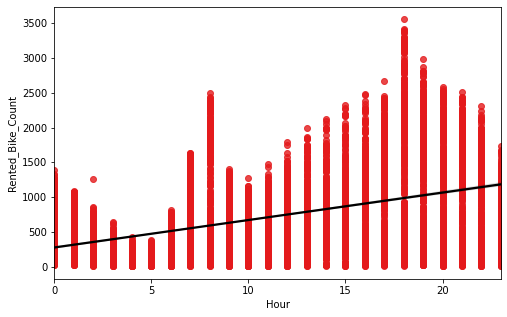

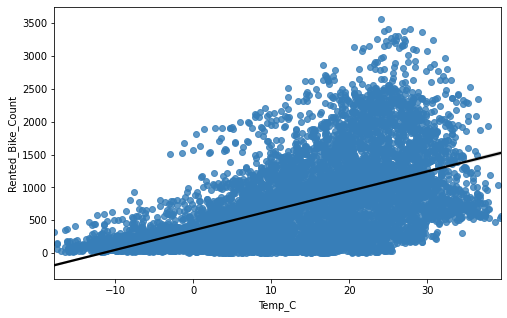

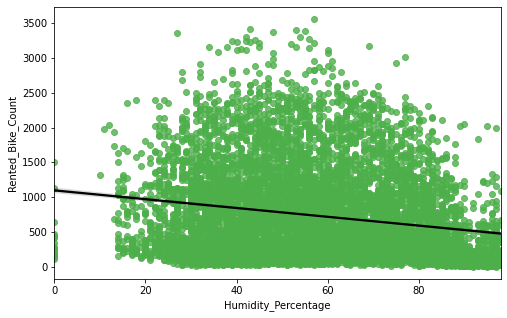

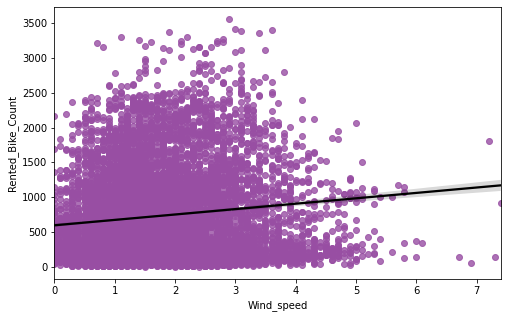

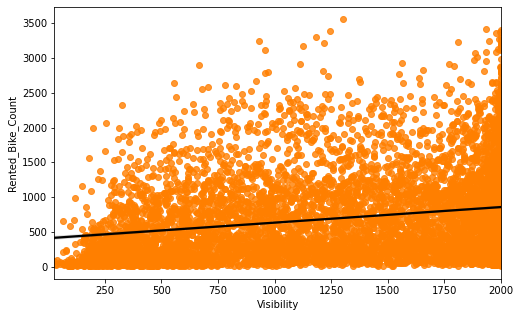

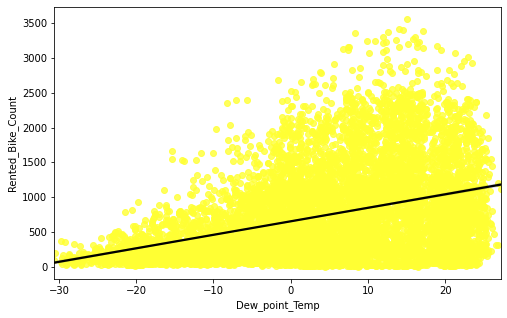

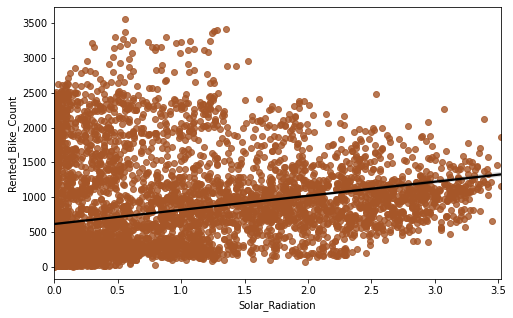

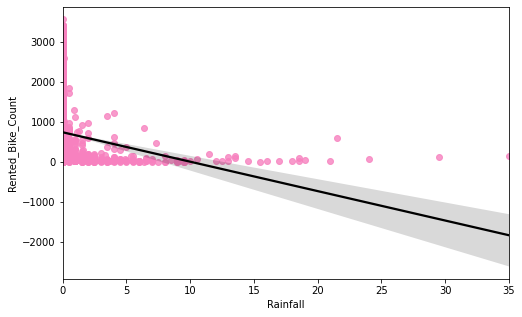

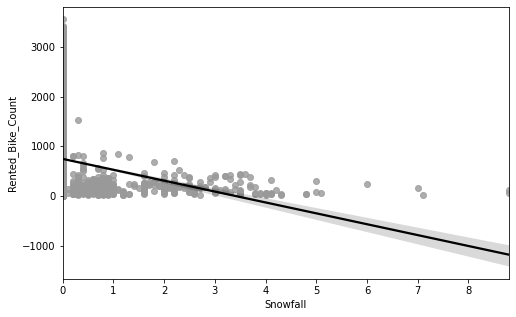

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

###**Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


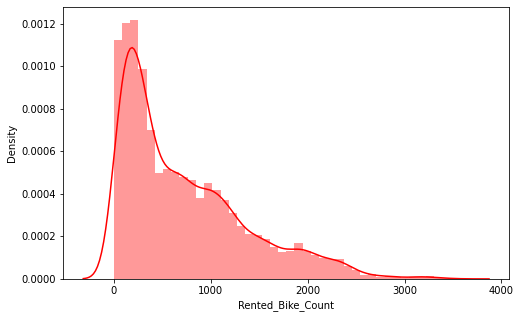

In [ ]:
sns.distplot(bike_data['Rented_Bike_Count'], color='r')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

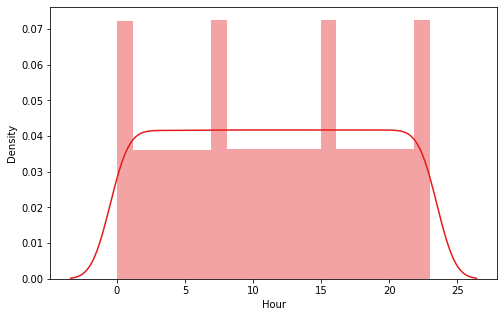

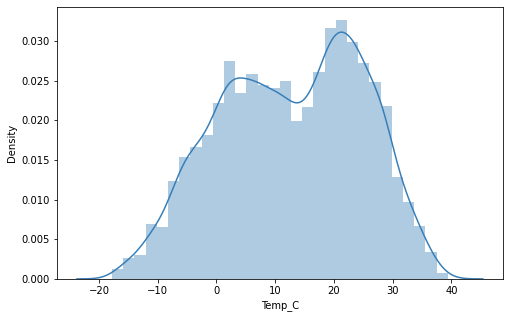

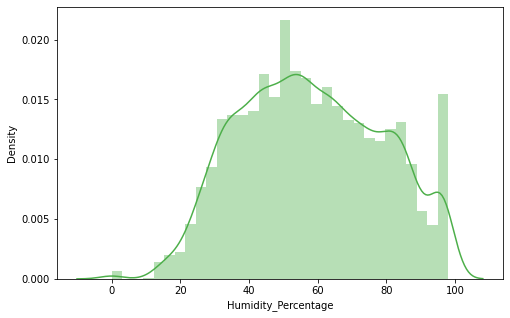

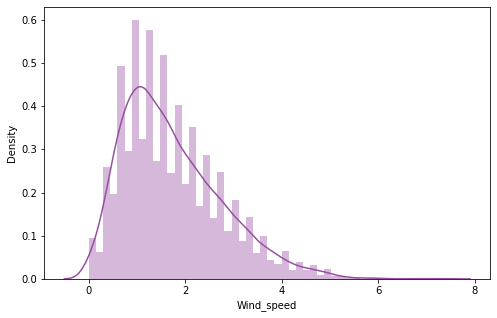

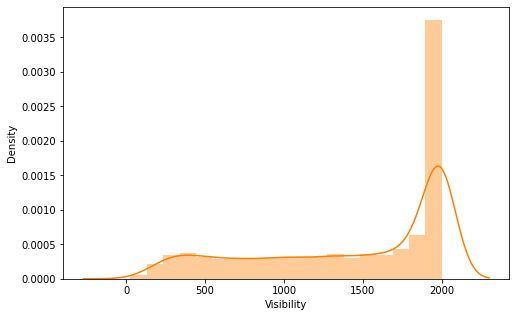

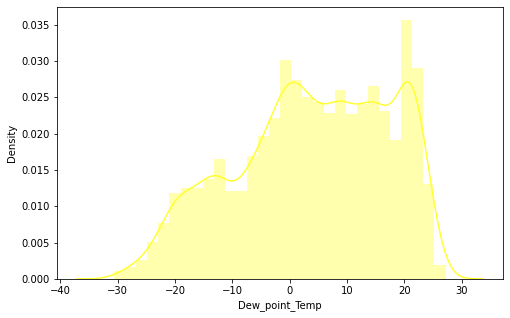

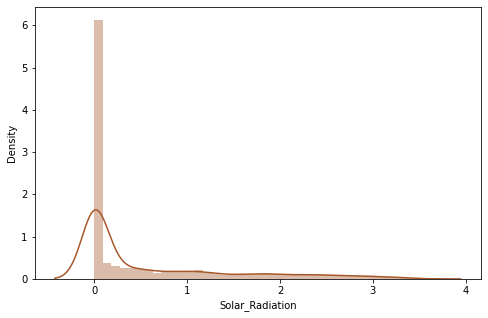

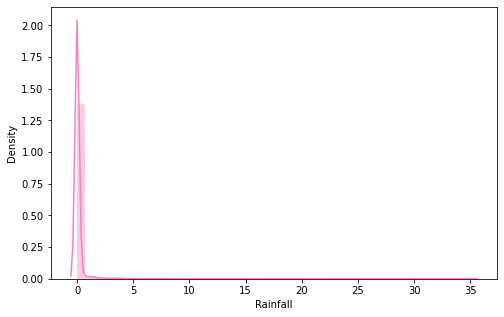

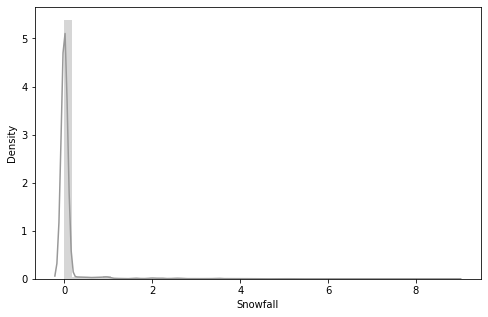

In [ ]:
# Distributions
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.distplot(bike_data[col], color= color_map[key])

### Trend of Bike Renting

###**Change in Bike Renting with Change in hours**

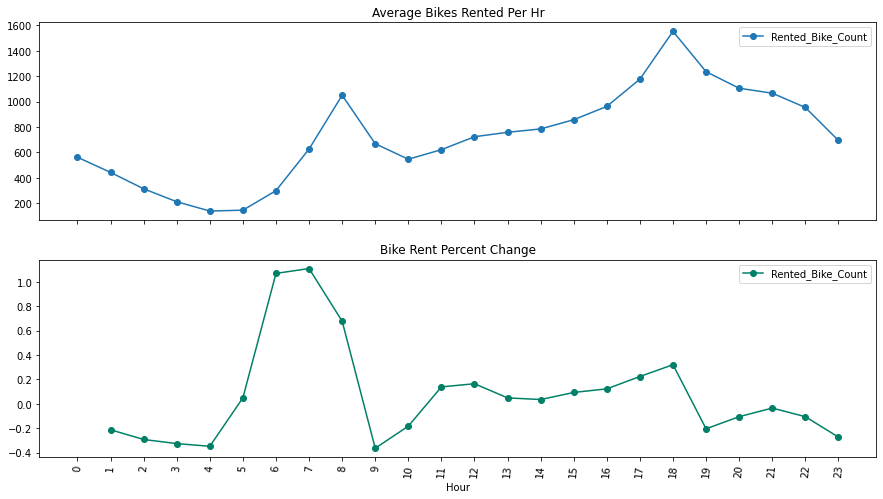

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))


###Change in Bike rent with change in months

Date_temp
01/2018     201.620968
02/2018     225.941964
03/2018     511.551075
04/2018     753.199713
05/2018     982.066667
06/2018    1245.676389
07/2018     987.177419
08/2018     876.192204
09/2018    1079.506410
10/2018     978.458647
11/2018     718.695988
12/2017     249.099462
Name: Rented_Bike_Count, dtype: float64


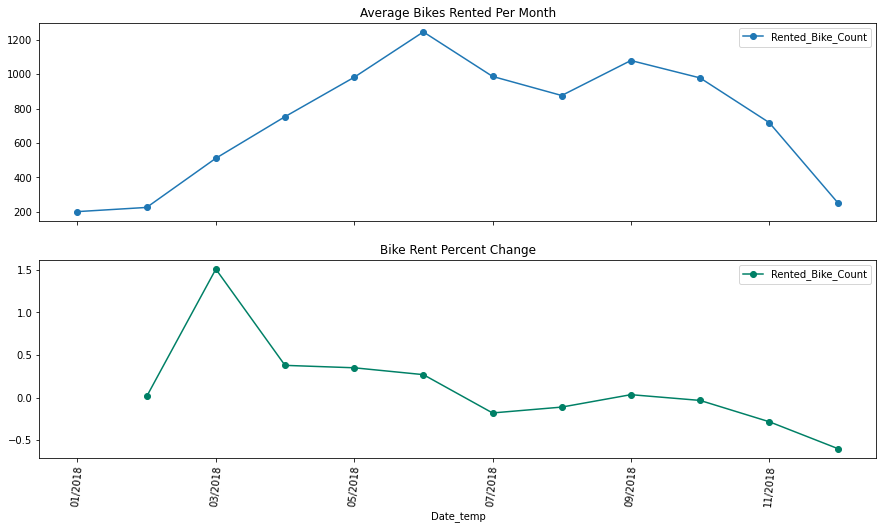

In [ ]:
bike_data['Date_temp'] = bike_data['Date'].apply(lambda x: (str(x)[3:]))

# group by Date(months) and get average Bikes rented
avg_rent_months = bike_data.groupby('Date_temp')['Rented_Bike_Count'].mean()
pct_rent_months = bike_data.groupby('Date_temp')['Rented_Bike_Count'].sum().pct_change()
print(avg_rent_months)

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over months
avg_rent_months.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Month")
ax1.set_xticks(range(len(avg_rent_months)))
ax1.set_xticklabels(avg_rent_months.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_months.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")

###Feature Eng.

In [ ]:
# One hot encoding
bike_data = pd.get_dummies(bike_data, columns=['Seasons'], prefix=['Seasons'])

In [ ]:
# Create dummy variables for the catgeorical variable 
bike_data['Holiday'] = np.where(bike_data['Holiday']=='Holiday', 1, 0)

In [ ]:
bike_data.head(3)

,Date,Rented_Bike_Count,Hour,Temp_C,Humidity_Percentage,Wind_speed,Visibility,Dew_point_Temp,Solar_Radiation,Rainfall,Snowfall,Holiday,Date_temp,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,12/2017,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,12/2017,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,12/2017,0,0,0,1


In [ ]:
# Seperating month, year and day from date.
bike_data['Month'] = bike_data['Date'].apply(lambda x: int((str(x)[3:5])))
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = bike_data['Date'].apply(lambda x: int((str(x)[:2])))

In [ ]:
avg_rent_months = pd.DataFrame(bike_data.groupby(['Date_temp', 'Year'])['Rented_Bike_Count'].mean())

In [ ]:
avg_rent_months = avg_rent_months.sort_values(by=['Year'])

In [ ]:
avg_rent_months = pd.DataFrame(avg_rent_months['Rented_Bike_Count'].shift(+1))

In [ ]:
# Rename Column
avg_rent_months.rename(columns={'Rented_Bike_Count':'Prev_month_Bike_rent_counts'}, inplace=True)

In [ ]:
avg_rent_months.reset_index(inplace=True)

In [ ]:
avg_rent_months.drop(['Year'], axis = 1, inplace =True)

In [ ]:
avg_rent_months['Prev_month_Bike_rent_counts'].fillna(225, inplace = True)

In [ ]:
avg_rent_months

,Date_temp,Prev_month_Bike_rent_counts
0,12/2017,225.000000
1,01/2018,249.099462
2,02/2018,201.620968
3,03/2018,225.941964
4,04/2018,511.551075
5,05/2018,753.199713
6,06/2018,982.066667
7,07/2018,1245.676389
8,08/2018,987.177419
9,09/2018,876.192204


In [ ]:
Final_df = pd.merge(bike_data, avg_rent_months, on='Date_temp', how='left')

###Raarranging Final DF

In [ ]:
Final_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temp_C', 'Humidity_Percentage',
       'Wind_speed', 'Visibility', 'Dew_point_Temp', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Holiday', 'Date_temp', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month', 'Year',
       'Day', 'Prev_month_Bike_rent_counts'],
      dtype='object')

In [ ]:
Final_df.drop(['Date', 'Date_temp', 'Year'], axis = 1, inplace=True)

In [ ]:
#Final_df.drop(['Dew_point_Temp'], axis = 1, inplace=True)

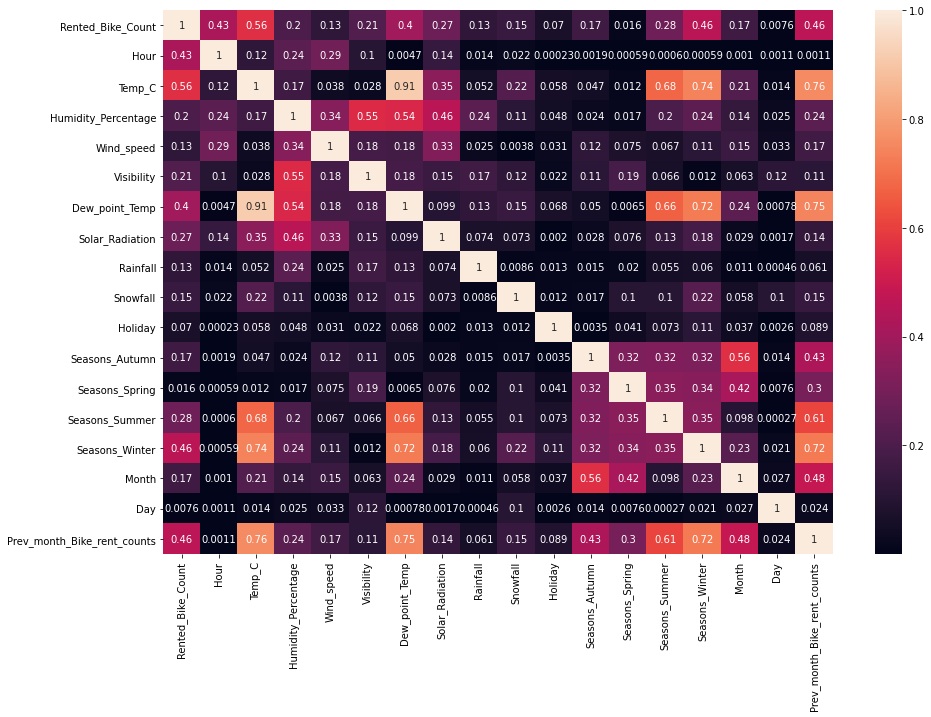

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(Final_df.corr().abs(), annot=True)

##**PCA for wheather features**

In [ ]:
# highly correlated
temp = Final_df[['Temp_C', 'Dew_point_Temp']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Scaling
temp = scaler.fit_transform(temp)

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
# Normalizing
temp = normalize(temp)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Minimizing to 1 variable
pca = PCA(n_components=1)
temp_principal = pca.fit_transform(temp)

In [ ]:
# Explained Variance
pca.explained_variance_

array([0.84121691])

In [ ]:
temp_df = pd.DataFrame(temp_principal)
temp_df.columns = ['Wheather_Temp']

In [ ]:
# Concat DF
Final_df = pd.concat([Final_df,temp_df],axis=1)

In [ ]:
# Dropping original columns
Final_df.drop(['Temp_C', 'Dew_point_Temp'], axis = 1, inplace= True)

In [ ]:
Final_df.head(3)

,Rented_Bike_Count,Hour,Humidity_Percentage,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month,Day,Prev_month_Bike_rent_counts,Wheather_Temp
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,1,12,1,225.0,1.033330
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,0,0,0,1,12,1,225.0,1.033909
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,0,0,0,1,12,1,225.0,1.034583


###**PCA for other wheather features**

In [ ]:
temp = Final_df[['Humidity_Percentage', 'Visibility', 'Solar_Radiation']]

In [ ]:
# Sclaing
temp = scaler.fit_transform(temp)

In [ ]:
# Normalize
temp = normalize(temp)

In [ ]:
pca = PCA(n_components = 1)
temp_principal = pca.fit_transform(temp)

In [ ]:
pca.explained_variance_

array([0.49612577])

In [ ]:
temp_df = pd.DataFrame(temp_principal)
temp_df.columns = ['Wheather_Visibility']

In [ ]:
# Concat DF
Final_df = pd.concat([Final_df,temp_df],axis=1)
# Dropping original columns
Final_df.drop(['Humidity_Percentage', 'Visibility', 'Solar_Radiation'], axis = 1, inplace= True)

In [ ]:
Final_df.head(3)

,Rented_Bike_Count,Hour,Wind_speed,Rainfall,Snowfall,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month,Day,Prev_month_Bike_rent_counts,Wheather_Temp,Wheather_Visibility
0,254,0,2.2,0.0,0.0,0,0,0,0,1,12,1,225.0,1.033330,-0.728075
1,204,1,0.8,0.0,0.0,0,0,0,0,1,12,1,225.0,1.033909,-0.722550
2,173,2,1.0,0.0,0.0,0,0,0,0,1,12,1,225.0,1.034583,-0.716328


###**Saving Final DF**

In [ ]:
# Saving Final DF
Final_df.to_csv(folder + 'Final_dataset.csv', index= False)

In [ ]:
# Importing saved DF
Final_df_saved = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df_saved.shape

(8465, 15)

###**Base Models**

In [ ]:
# Copy of DataFrame
LR_df = Final_df_saved.copy()

In [ ]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [ ]:
LR_df['Rented_Bike_Count'] = np.sqrt(LR_df['Rented_Bike_Count'])

In [ ]:
# X and Y
X = LR_df.drop(['Rented_Bike_Count'], axis = 1)
y = LR_df['Rented_Bike_Count']

###**Statistical Model**

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#adding constant and building model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     902.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:10:17   Log-Likelihood:                -29261.
No. Observations:                8465   AIC:                         5.855e+04
Df Residuals:                    8451   BIC:                         5.865e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          10.2715      0.437     23.518      0.000       9.415      11.128
Hour                            0.6158      0.013     48.187      0.000       0.591       0.641
Wind_speed                      0.1837      0.090      2.045      0.041       0.008       0.360
Rainfall                       -2.0402      0.076    -26.964      0.000      -2.189      -1.892
Snowfall                       -0.6717      0.198     -3.394      0.001      -1.060      -0.284
Holiday                        -2.7934      0.396     -7.052      0.000      -3.570      -2.017
Seasons_Autumn                  4.4216      0.337     13.123      0.000       3.761       5.082
Seasons_Spring                  4.5403      0.166     27.422      0.000       4.216       4.865
Seasons_Summer                  3.8003      0.364     10.454      0.000       3.088       4.513
Seasons_Winter                 -2.4907      0.278     -8.968      0.000      -3.035      -1.946
Month                           0.1598      0.032      4.921      0.000       0.096       0.224
Day                             0.0360      0.010      3.748      0.000       0.017       0.055
Prev_month_Bike_rent_counts     0.0043      0.001      6.490      0.000       0.003       0.006
Wheather_Temp                  -3.4127      0.150    -22.758      0.000      -3.707      -3.119
Wheather_Visibility            -3.6698      0.132    -27.784      0.000      -3.929      -3.411
==============================================================================
Omnibus:                      163.977   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.564
Skew:                           0.088   Prob(JB):                     7.42e-72
Kurtosis:                       3.948   Cond. No.                     2.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.57e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Lasso Regression for Feature Importance.**

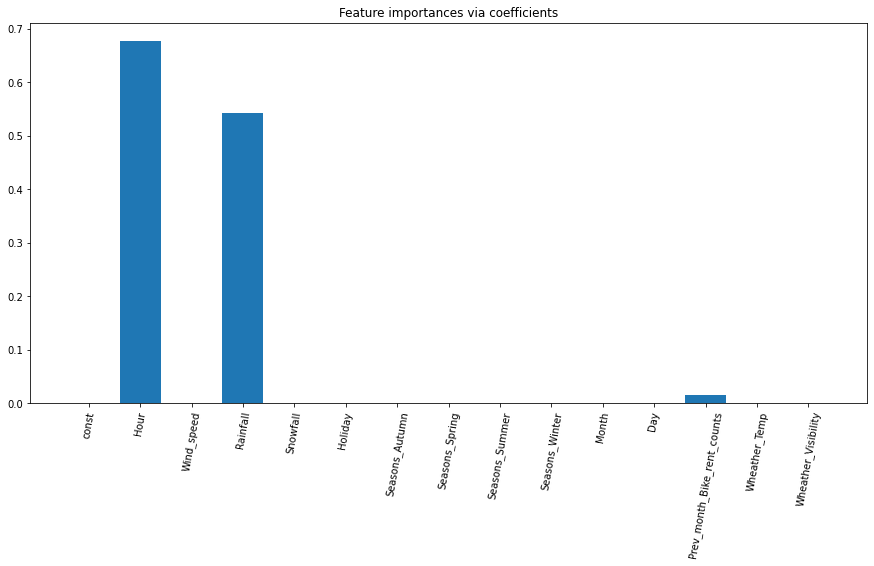

In [ ]:
plt.subplots(figsize=(15,7))
lasso = LassoCV()
lasso.fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(lasso).fit(X, y)
feature_names[sfm.get_support()]

Index(['Hour', 'Rainfall', 'Prev_month_Bike_rent_counts'], dtype='object')

##**Linear Regression**

In [ ]:
# X and Y
X = LR_df.drop(['Rented_Bike_Count'], axis = 1)
y = LR_df['Rented_Bike_Count']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5925, 14), (2540, 14), (5925,), (2540,))

In [ ]:
# Fitting Multiple Linear Regression to the Training set
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
LR_test_pred = LR_model.predict(X_test)

In [ ]:
# Predicting Train
LR_Train_preds = LR_model.predict(X_train)

In [ ]:
# MSE
mean_squared_error(y_test**2,LR_test_pred**2)

178649.047186654

In [ ]:
# MSE - Train
mean_squared_error(y_train**2,LR_Train_preds**2)

182066.96108056937

In [ ]:
# R-sqaured for Train
r2_score(y_train**2, LR_Train_preds**2)

0.5622311475237579

In [ ]:
# R-sqaured for Test
r2_score(y_test**2, LR_test_pred**2)

0.5586399258797418

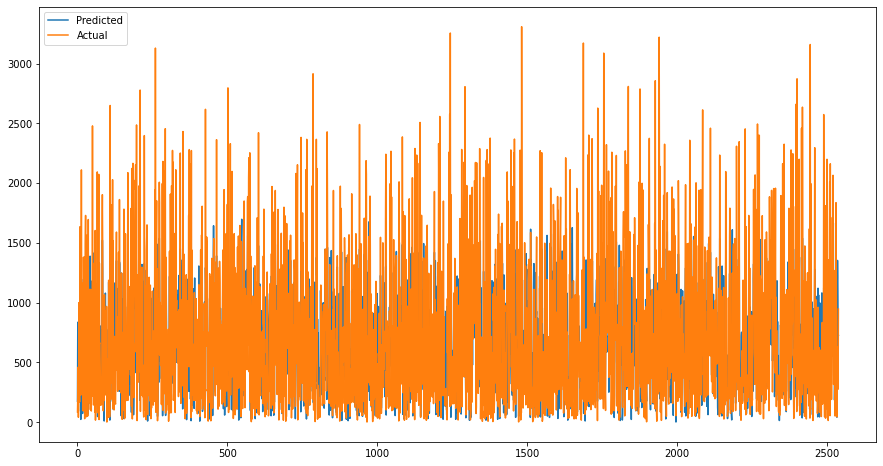

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(LR_test_pred**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

###**Decision Trees**

In [ ]:
X = Final_df_saved.drop(['Rented_Bike_Count'], axis = 1)
y = Final_df_saved['Rented_Bike_Count']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
# Importing DT Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setting parameters for Grid Search
# Criteria
criterion = ['mse','mae']

# Maximum depth of trees
max_depth = [ 6,8,10,12,15]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

param_dict

{'criterion': ['mse', 'mae'], 'max_depth': [6, 8, 10, 12, 15]}

In [ ]:
# Create an instance of the Decision Tree Regressor
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring ='r2')

DTR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] criterion=mse, max_depth=6 ......................................
[CV] ....................... criterion=mse, max_depth=6, total=   0.0s
[CV] criterion=mse, max_depth=6 ......................................
[CV] ....................... criterion=mse, max_depth=6, total=   0.0s
[CV] criterion=mse, max_depth=6 ......................................
[CV] ....................... criterion=mse, max_depth=6, total=   0.0s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   0.0s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   0.0s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   0.0s
[CV] criterion=mse, max_depth=10 .....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... criterion=mse, max_depth=12, total=   0.0s
[CV] criterion=mse, max_depth=12 .....................................
[CV] ...................... criterion=mse, max_depth=12, total=   0.0s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   0.0s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   0.0s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   0.0s
[CV] criterion=mae, max_depth=6 ......................................
[CV] ....................... criterion=mae, max_depth=6, total=   0.6s
[CV] criterion=mae, max_depth=6 ......................................
[CV] ....................... criterion=mae, max_depth=6, total=   0.6s
[CV] criterion=mae, max_depth=6 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [6, 8, 10, 12, 15]},
             pre_dispatch='2*n_jobs', refi

In [ ]:
DTR_grid.best_score_

0.7807128827794981

In [ ]:
DTR_grid.best_params_

{'criterion': 'mse', 'max_depth': 10}

In [ ]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

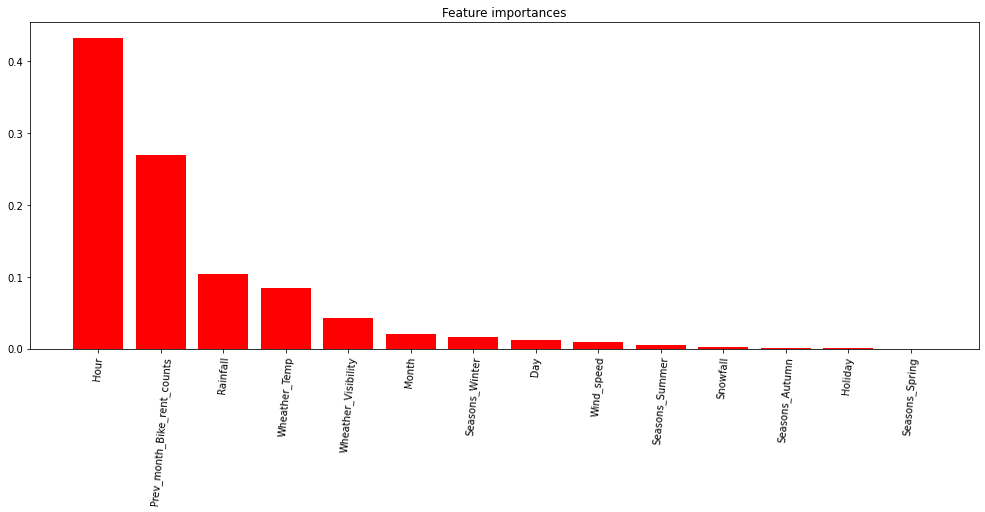

In [ ]:
# Feature importance
feature_importances_DTR = pd.DataFrame(DTR_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_DTR']).sort_values('importance_DTR',
                                                                        ascending=False)
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_DTR.index, feature_importances_DTR['importance_DTR'],
        color="r",  align="center")
plt.xticks(feature_importances_DTR.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Predictions Train and Test
DTR_train_pred = DTR_optimal_model.predict(X_train)
DTR_test_pred = DTR_optimal_model.predict(X_test)

In [ ]:
# MSE - Test 
mean_squared_error(y_test,DTR_test_pred)

96516.98003128784

In [ ]:
# MSE - Train
mean_squared_error(y_train, DTR_train_pred)

52017.416571497015

In [ ]:
# R-sqaured for Train
r2_score(y_train, DTR_train_pred)

0.8749273090178845

In [ ]:
# R-sqaured for Test
r2_score(y_test, DTR_test_pred)

0.7615506932093226

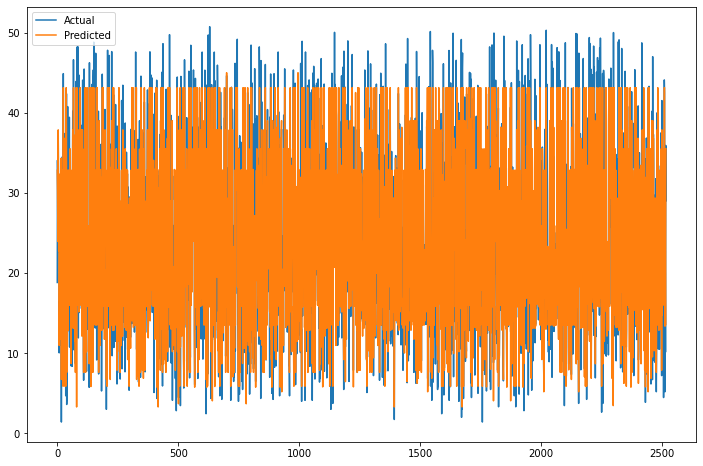

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_test))
plt.plot(DTR_test_pred)
plt.legend(["Actual","Predicted"])
plt.show()

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Criterion
criterion = ['mse', 'mae']
# Maximum depth of trees
max_depth = [6,8,10,12]

# Number of estimator
n_estimators = [50,80,100, 150]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'criterion': ['mse', 'mae'],
 'max_depth': [6, 8, 10, 12],
 'n_estimators': [50, 80, 100, 150]}

In [ ]:
# Create an instance of the Decision Tree Regressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring ='r2')

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] criterion=mse, max_depth=6, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... criterion=mse, max_depth=6, n_estimators=50, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... criterion=mse, max_depth=6, n_estimators=50, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=50 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=50, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=80 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=80, total=   0.7s
[CV] criterion=mse, max_depth=6, n_estimators=80 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=80, total=   0.7s
[CV] criterion=mse, max_depth=6, n_estimators=80 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=80, total=   0.8s
[CV] criterion=mse, max_depth=6, n_estimators=100 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=100, total=   0.9s
[CV] criterion=mse, max_depth=6, n_estimators=100 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=100, total=   0.9s
[CV] criterion=mse, max_depth=6, n_estimators=100 ....................
[CV] .

KeyboardInterrupt: ignored

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
y_pred_train_rf = rf_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_rf = rf_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# MSE - Test 
mean_squared_error(y_test,y_pred_test_rf)

In [ ]:
# MSE - Train
mean_squared_error(y_train,y_pred_train_rf)

In [ ]:
# Test
r2_score((y_test), (y_pred_test_rf))

In [ ]:
# Train
r2_score((y_train), (y_pred_train_rf))

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rf_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

##**SVR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
# X and Y
X = LR_df.drop(['Rented_Bike_Count'], axis = 1)
y = LR_df['Rented_Bike_Count']
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
# Setting parameters for Grid Search CV

# kernel
kernel = ['rbf', 'linear', 'poly']

# C
C = [1000]

# gamma
gamma = ['auto', 'scale']

#epsilon
epsilon = [0.1,1,0.01]


parameters = { 'kernel' : kernel,
              'C' : C , 'gamma' : gamma, 'epsilon':epsilon
              }

parameters

{'C': [100, 1000, 1200],
 'epsilon': [0.1, 1, 0.01],
 'gamma': ['auto', 'scale'],
 'kernel': ['rbf', 'linear', 'poly']}

In [ ]:
# Grid search
SVR_grid = GridSearchCV(estimator=SVR(),
                       param_grid = parameters,
                       cv = 3, verbose=2, scoring= 'r2')

SVR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] C=100, epsilon=0.1, gamma=auto, kernel=rbf ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=100, epsilon=0.1, gamma=auto, kernel=rbf, total=   3.0s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=rbf ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ....... C=100, epsilon=0.1, gamma=auto, kernel=rbf, total=   3.0s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=rbf ......................
[CV] ....... C=100, epsilon=0.1, gamma=auto, kernel=rbf, total=   3.2s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=linear ...................
[CV] .... C=100, epsilon=0.1, gamma=auto, kernel=linear, total=  14.8s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=linear ...................
[CV] .... C=100, epsilon=0.1, gamma=auto, kernel=linear, total=  13.9s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=linear ...................
[CV] .... C=100, epsilon=0.1, gamma=auto, kernel=linear, total=  14.0s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=poly .....................
[CV] ...... C=100, epsilon=0.1, gamma=auto, kernel=poly, total=  19.6s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=poly .....................
[CV] ...... C=100, epsilon=0.1, gamma=auto, kernel=poly, total=  20.2s
[CV] C=100, epsilon=0.1, gamma=auto, kernel=poly .....................
[CV] .

In [ ]:
SVR_grid.best_score_

0.7075786978125032

In [ ]:
SVR_grid.best_params_

{'C': 1000, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
svr_optimal_model = SVR_grid.best_estimator_
svr_optimal_model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_y_pred_train = svr_optimal_model.predict(X_train)   # Prediction for train dataset
svr_y_pred_test = svr_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# Feature Importance
features_names = (X.columns.to_list())
from mlxtend.evaluate import feature_importance_permutation
imp_vals, _ = feature_importance_permutation(
    predict_method=svr_optimal_model.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)

Text(0.5, 1.0, 'SVR Feature importances')

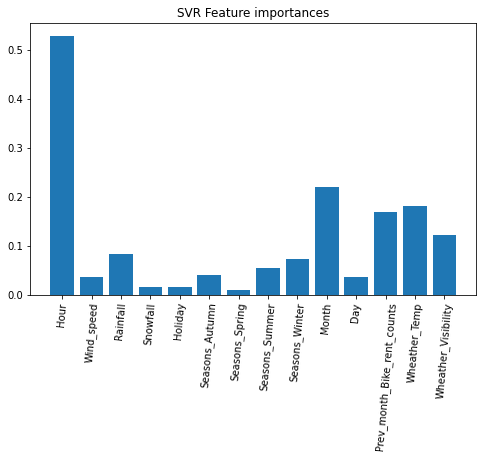

In [ ]:
plt.figure()
plt.bar(features_names, imp_vals)
plt.xticks(features_names, rotation = 85)
plt.title("SVR Feature importances")
#plt.xlim([-1, feature_names.shape[1]])
#plt.ylim([0, 0.5])
#plt.show()

In [ ]:
# MSE - Test 
mean_squared_error(y_test,svr_y_pred_test)

114787.42944348304

In [ ]:
# Test
r2_score(y_test, svr_y_pred_test)

0.7164127703725345

In [ ]:
# Train
r2_score(y_train, svr_y_pred_train)

0.7317474874685423

###**XGB**

In [ ]:
import xgboost as xgb

In [ ]:
# X and Y
X = LR_df.drop(['Rented_Bike_Count'], axis = 1)
y = LR_df['Rented_Bike_Count']

In [ ]:
#X = Final_df_saved.drop(['Rented_Bike_Count'], axis = 1)
#y = Final_df_saved['Rented_Bike_Count']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
# Number of trees
n_estimators = [100, 150, 200, 250]

# Maximum depth of trees
max_depth = [6,8]

# Child weight
min_child_weight= [8, 10]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict

{'max_depth': [6, 8],
 'min_child_weight': [8, 10],
 'n_estimators': [100, 150, 200, 250]}

In [ ]:
XGB = xgb.XGBRegressor()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2' )

XGB_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=6, min_child_weight=8, n_estimators=100 ...............
[14:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_child_weight=8, n_estimators=100, total=   0.5s
[CV] max_depth=6, min_child_weight=8, n_estimators=100 ...............
[14:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=6, min_child_weight=8, n_estimators=100, total=   0.6s
[CV] max_depth=6, min_child_weight=8, n_estimators=100 ...............
[14:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_child_weight=8, n_estimators=100, total=   0.6s
[CV] max_depth=6, min_child_weight=8, n_estimators=150 ...............
[14:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_child_weight=8, n_estimators=150, total=   0.8s
[CV] max_depth=6, min_child_weight=8, n_estimators=150 ...............
[14:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_child_weight=8, n_estimators=150, total=   0.8s
[CV] max_depth=6, min_child_weight=8, n_estimators=150 ...............
[14:27:07] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   51.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8], 'min_child_weight': [8, 10],
                         'n_estimators': [100, 150, 200, 

In [ ]:
XGB_grid.best_score_

0.8981674024625343

In [ ]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 250}

In [ ]:
XGB_optimal_model = XGB_grid.best_estimator_
XGB_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
XGB_y_pred_train = XGB_optimal_model.predict(X_train)   # Prediction for train dataset
XGB_y_pred_test = XGB_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# MSE - Test 
mean_squared_error(y_test,XGB_y_pred_test)

14.722384961539511

In [ ]:
# MSE - Train
mean_squared_error(y_train,XGB_y_pred_train)

3.811452371987565

In [ ]:
# Test
r2_score(y_test, XGB_y_pred_test)

0.8907878564283443

In [ ]:
# Train
r2_score(y_train, XGB_y_pred_train)

0.9713057966724173

###**LIGHT GBM**

In [ ]:
import lightgbm as lgb

In [ ]:
# Maximum depth of trees
max_depth = [6,7,8]

# bagging fraction
bagging_fraction = [0.5, 0.6,0.7]

#max-bin
max_bin = [200,400]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'bagging_fraction': [0.5, 0.6, 0.7],
 'max_bin': [200, 400],
 'max_depth': [6, 7, 8]}

In [ ]:
# Create an instance of the RandomForestRegressor
LGB = lgb.LGBMRegressor()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2')

LGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] bagging_fraction=0.5, max_bin=200, max_depth=6 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=6, total=   0.1s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=6 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=6, total=   0.1s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=6 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=6, total=   0.1s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=7 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=7, total=   0.2s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=7 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=7, total=   0.1s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=7 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=7, total=   0.1s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=8, total=   0.2s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=200, max_depth=8, total=   0.2s
[CV] bagging_fraction=0.5, max_bin=200, max_depth=8 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    8.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.6, 0.7],
                         'max_bin': [200, 400], 'max_depth': [6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=T

In [ ]:
LGB_grid.best_score_

0.8950413588862222

In [ ]:
optimal_model = LGB_grid.best_estimator_
optimal_model

LGBMRegressor(bagging_fraction=0.5, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_bin=200, max_depth=8, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
LGB_grid.best_params_

{'bagging_fraction': 0.5, 'max_bin': 200, 'max_depth': 8}

In [ ]:
y_pred_train_LGB = optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_LGB = optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# MSE - Test 
mean_squared_error(y_test,y_pred_test_LGB)

15.4992646513444

In [ ]:
# R-sqaured for Train
r2_score(y_train, y_pred_train_LGB)

0.9412547724327247

In [ ]:
# R-sqaured for Test
r2_score(y_test, y_pred_test_LGB)

0.8850248841624702